In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV as RandomSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor,plot_tree

from sklearn.ensemble import RandomForestRegressor

In [28]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
df = pd.read_csv("ultimate_student_productivity_dataset_5000.csv")
df.head()

,student_id,age,gender,academic_level,study_hours,self_study_hours,online_classes_hours,social_media_hours,gaming_hours,sleep_hours,...,exercise_minutes,caffeine_intake_mg,part_time_job,upcoming_deadline,internet_quality,mental_health_score,focus_index,burnout_level,productivity_score,exam_score
0,1,18,Other,High School,7.64,1.56,2.20,3.05,2.19,6.52,...,81,38,1,0,Good,10,43.05,31.77,73.65,50.16
1,2,18,Other,High School,2.21,2.22,2.10,1.65,2.55,5.97,...,111,339,0,0,Good,3,15.92,37.00,13.70,1.00
2,3,22,Male,High School,3.45,0.00,0.29,1.34,2.08,8.39,...,68,266,0,1,Good,8,27.39,34.37,45.15,18.30
3,4,17,Other,High School,5.75,2.08,3.01,2.27,2.20,6.31,...,113,480,1,1,Poor,3,22.31,77.31,20.92,9.37
4,5,19,Other,High School,6.83,1.72,3.33,2.65,0.70,8.01,...,121,24,1,0,Good,8,38.11,39.53,59.23,27.81


In [29]:
df.isna().sum()

student_id              0
age                     0
gender                  0
academic_level          0
study_hours             0
self_study_hours        0
online_classes_hours    0
social_media_hours      0
gaming_hours            0
sleep_hours             0
screen_time_hours       0
exercise_minutes        0
caffeine_intake_mg      0
part_time_job           0
upcoming_deadline       0
internet_quality        0
mental_health_score     0
focus_index             0
burnout_level           0
productivity_score      0
exam_score              0
dtype: int64

In [30]:
df = df.drop(['student_id','gender','screen_time_hours'],axis=1)

In [31]:
df.sample()

,age,academic_level,study_hours,self_study_hours,online_classes_hours,social_media_hours,gaming_hours,sleep_hours,exercise_minutes,caffeine_intake_mg,part_time_job,upcoming_deadline,internet_quality,mental_health_score,focus_index,burnout_level,productivity_score,exam_score
2381,22,High School,4.84,3.24,2.79,0.31,0.32,5.92,35,439,1,0,Average,1,27.23,72.6,18.9,1.0


In [32]:
df['Total_hours'] = df['study_hours'] +df['self_study_hours'] + df['online_classes_hours']

In [33]:
df

,age,academic_level,study_hours,self_study_hours,online_classes_hours,social_media_hours,gaming_hours,sleep_hours,exercise_minutes,caffeine_intake_mg,part_time_job,upcoming_deadline,internet_quality,mental_health_score,focus_index,burnout_level,productivity_score,exam_score,Total_hours
0,18,High School,7.64,1.56,2.20,3.05,2.19,6.52,81,38,1,0,Good,10,43.05,31.77,73.65,50.16,11.40
1,18,High School,2.21,2.22,2.10,1.65,2.55,5.97,111,339,0,0,Good,3,15.92,37.00,13.70,1.00,6.53
2,22,High School,3.45,0.00,0.29,1.34,2.08,8.39,68,266,0,1,Good,8,27.39,34.37,45.15,18.30,3.74
3,17,High School,5.75,2.08,3.01,2.27,2.20,6.31,113,480,1,1,Poor,3,22.31,77.31,20.92,9.37,10.84
4,19,High School,6.83,1.72,3.33,2.65,0.70,8.01,121,24,1,0,Good,8,38.11,39.53,59.23,27.81,11.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,20,Undergraduate,3.93,1.42,0.54,2.58,2.62,9.30,113,496,0,0,Good,9,35.55,33.24,48.83,22.51,5.89
4996,24,High School,4.00,0.00,3.00,4.45,2.47,6.42,146,411,0,1,Poor,5,16.87,59.07,23.32,2.00,7.00
4997,22,Undergraduate,5.63,2.52,2.89,3.58,1.07,6.65,123,306,0,1,Good,7,23.85,47.72,41.09,27.89,11.04
4998,17,Undergraduate,3.58,2.83,1.53,5.88,1.28,7.36,54,304,1,1,Good,4,13.04,58.90,12.62,3.63,7.94


In [34]:
df=df.drop(['study_hours','self_study_hours','online_classes_hours'],axis=1)

In [35]:
df

,age,academic_level,social_media_hours,gaming_hours,sleep_hours,exercise_minutes,caffeine_intake_mg,part_time_job,upcoming_deadline,internet_quality,mental_health_score,focus_index,burnout_level,productivity_score,exam_score,Total_hours
0,18,High School,3.05,2.19,6.52,81,38,1,0,Good,10,43.05,31.77,73.65,50.16,11.40
1,18,High School,1.65,2.55,5.97,111,339,0,0,Good,3,15.92,37.00,13.70,1.00,6.53
2,22,High School,1.34,2.08,8.39,68,266,0,1,Good,8,27.39,34.37,45.15,18.30,3.74
3,17,High School,2.27,2.20,6.31,113,480,1,1,Poor,3,22.31,77.31,20.92,9.37,10.84
4,19,High School,2.65,0.70,8.01,121,24,1,0,Good,8,38.11,39.53,59.23,27.81,11.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,20,Undergraduate,2.58,2.62,9.30,113,496,0,0,Good,9,35.55,33.24,48.83,22.51,5.89
4996,24,High School,4.45,2.47,6.42,146,411,0,1,Poor,5,16.87,59.07,23.32,2.00,7.00
4997,22,Undergraduate,3.58,1.07,6.65,123,306,0,1,Good,7,23.85,47.72,41.09,27.89,11.04
4998,17,Undergraduate,5.88,1.28,7.36,54,304,1,1,Good,4,13.04,58.90,12.62,3.63,7.94


In [36]:
df['Screen_Time'] = df['social_media_hours'] + df['gaming_hours']

In [37]:
df = df.drop(['social_media_hours','gaming_hours'],axis=1)

In [38]:
df

,age,academic_level,sleep_hours,exercise_minutes,caffeine_intake_mg,part_time_job,upcoming_deadline,internet_quality,mental_health_score,focus_index,burnout_level,productivity_score,exam_score,Total_hours,Screen_Time
0,18,High School,6.52,81,38,1,0,Good,10,43.05,31.77,73.65,50.16,11.40,5.24
1,18,High School,5.97,111,339,0,0,Good,3,15.92,37.00,13.70,1.00,6.53,4.20
2,22,High School,8.39,68,266,0,1,Good,8,27.39,34.37,45.15,18.30,3.74,3.42
3,17,High School,6.31,113,480,1,1,Poor,3,22.31,77.31,20.92,9.37,10.84,4.47
4,19,High School,8.01,121,24,1,0,Good,8,38.11,39.53,59.23,27.81,11.88,3.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,20,Undergraduate,9.30,113,496,0,0,Good,9,35.55,33.24,48.83,22.51,5.89,5.20
4996,24,High School,6.42,146,411,0,1,Poor,5,16.87,59.07,23.32,2.00,7.00,6.92
4997,22,Undergraduate,6.65,123,306,0,1,Good,7,23.85,47.72,41.09,27.89,11.04,4.65
4998,17,Undergraduate,7.36,54,304,1,1,Good,4,13.04,58.90,12.62,3.63,7.94,7.16


In [39]:
oe=OrdinalEncoder(categories=[['Poor','Average','Good'],['High School','Undergraduate','Postgraduate']])

In [40]:
df[['internet_quality','academic_level']]=oe.fit_transform(df[['internet_quality','academic_level']])

In [41]:
df

,age,academic_level,sleep_hours,exercise_minutes,caffeine_intake_mg,part_time_job,upcoming_deadline,internet_quality,mental_health_score,focus_index,burnout_level,productivity_score,exam_score,Total_hours,Screen_Time
0,18,0.0,6.52,81,38,1,0,2.0,10,43.05,31.77,73.65,50.16,11.40,5.24
1,18,0.0,5.97,111,339,0,0,2.0,3,15.92,37.00,13.70,1.00,6.53,4.20
2,22,0.0,8.39,68,266,0,1,2.0,8,27.39,34.37,45.15,18.30,3.74,3.42
3,17,0.0,6.31,113,480,1,1,0.0,3,22.31,77.31,20.92,9.37,10.84,4.47
4,19,0.0,8.01,121,24,1,0,2.0,8,38.11,39.53,59.23,27.81,11.88,3.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,20,1.0,9.30,113,496,0,0,2.0,9,35.55,33.24,48.83,22.51,5.89,5.20
4996,24,0.0,6.42,146,411,0,1,0.0,5,16.87,59.07,23.32,2.00,7.00,6.92
4997,22,1.0,6.65,123,306,0,1,2.0,7,23.85,47.72,41.09,27.89,11.04,4.65
4998,17,1.0,7.36,54,304,1,1,2.0,4,13.04,58.90,12.62,3.63,7.94,7.16


In [42]:
df=df.drop(['age','academic_level'],axis=1)

In [43]:
df.sample()

,sleep_hours,exercise_minutes,caffeine_intake_mg,part_time_job,upcoming_deadline,internet_quality,mental_health_score,focus_index,burnout_level,productivity_score,exam_score,Total_hours,Screen_Time
1802,6.21,80,130,1,1,2.0,2,22.45,51.17,22.48,8.88,8.9,6.12


In [44]:
df

,sleep_hours,exercise_minutes,caffeine_intake_mg,part_time_job,upcoming_deadline,internet_quality,mental_health_score,focus_index,burnout_level,productivity_score,exam_score,Total_hours,Screen_Time
0,6.52,81,38,1,0,2.0,10,43.05,31.77,73.65,50.16,11.40,5.24
1,5.97,111,339,0,0,2.0,3,15.92,37.00,13.70,1.00,6.53,4.20
2,8.39,68,266,0,1,2.0,8,27.39,34.37,45.15,18.30,3.74,3.42
3,6.31,113,480,1,1,0.0,3,22.31,77.31,20.92,9.37,10.84,4.47
4,8.01,121,24,1,0,2.0,8,38.11,39.53,59.23,27.81,11.88,3.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,9.30,113,496,0,0,2.0,9,35.55,33.24,48.83,22.51,5.89,5.20
4996,6.42,146,411,0,1,0.0,5,16.87,59.07,23.32,2.00,7.00,6.92
4997,6.65,123,306,0,1,2.0,7,23.85,47.72,41.09,27.89,11.04,4.65
4998,7.36,54,304,1,1,2.0,4,13.04,58.90,12.62,3.63,7.94,7.16


In [45]:
pd.DataFrame(df.corr()['exam_score'])

,exam_score
sleep_hours,0.234710
exercise_minutes,0.040724
caffeine_intake_mg,-0.075586
part_time_job,-0.149807
upcoming_deadline,-0.215342
internet_quality,-0.017539
mental_health_score,0.546547
focus_index,0.749879
burnout_level,-0.407808
productivity_score,0.886401


<Axes: >

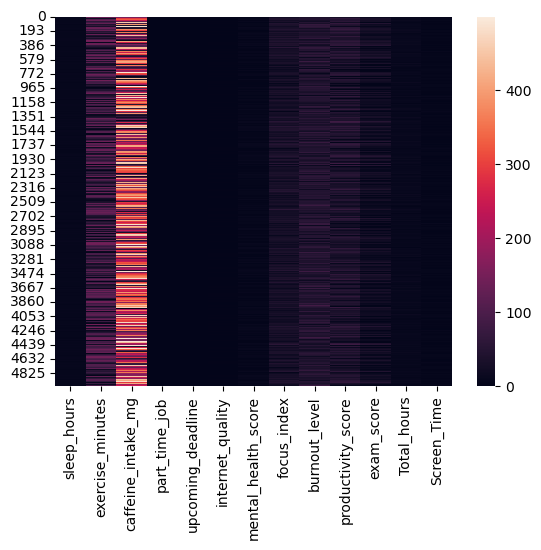

In [46]:
sns.heatmap(df)

Splitting the dataset

In [48]:
from sklearn.model_selection import train_test_split
X=df.drop('exam_score',axis=1)
Y = df[['exam_score']]

In [49]:
x_tr,x_test,y_tr,y_test=train_test_split(X,Y,random_state=0)

In [52]:
lr = LinearRegression()
lr.fit(x_tr,y_tr)
y_pred = lr.predict(x_test)
print(mean_absolute_error(y_test,y_pred))

3.9098938917275414


In [51]:
accuracy = r2_score(y_test,y_pred)
print("Accuracy of Linear Regression:", accuracy)

Accuracy of Linear Regression: 0.8315622040555848


In [53]:
rf = RandomForestRegressor()
rf.fit(x_tr,y_tr.values.ravel())
y_pred_rf = rf.predict(x_test)
print(mean_absolute_error(y_test,y_pred_rf))
accuracy_rf = r2_score(y_test,y_pred_rf)
print("Accuracy of Random Forest Regressor:", accuracy_rf)

3.8512576000000003
Accuracy of Random Forest Regressor: 0.830844577509212
